In [8]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

In [2]:
# Load the song
audio_path = './genres_original/rock/rock.00000.wav'  # You can use .wav or other supported formats
y, sr = librosa.load(audio_path, sr=None)  # 'y' is the waveform, 'sr' is the sample rate

In [3]:
# Generate the spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

# Convert to decibel scale for better visualization
S_dB = librosa.power_to_db(S, ref=np.max)

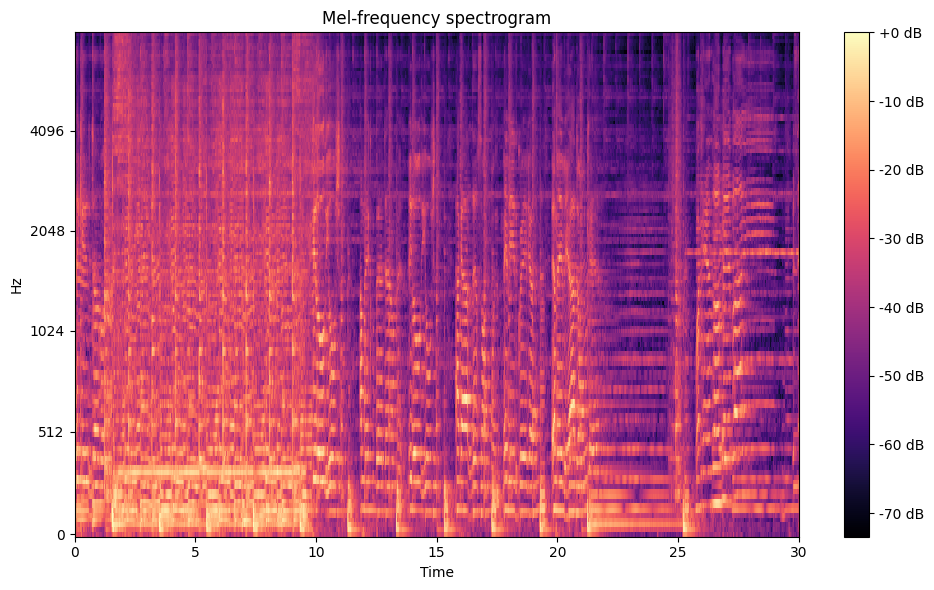

In [4]:
# Plot the spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel', fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()

In [5]:
# 1. Chroma Features
chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)

# 2. RMS (Root Mean Square) Energy
rms = librosa.feature.rms(y=y)

# 3. Spectral Centroid
spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)

# 4. Spectral Bandwidth
spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)

# 5. MFCC (Mel-Frequency Cepstral Coefficients)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # Commonly 13 MFCCs

# 6. Zero-Crossing Rate
zero_crossing_rate = librosa.feature.zero_crossing_rate(y)

# 7. Spectral Contrast
spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)

# You can print or access these features like so:
print("Chroma STFT shape: ", chroma_stft.shape)
print("RMS Energy shape: ", rms.shape)
print("Spectral Centroid shape: ", spectral_centroid.shape)
print("Spectral Bandwidth shape: ", spectral_bandwidth.shape)
print("MFCCs shape: ", mfccs.shape)
print("Zero Crossing Rate shape: ", zero_crossing_rate.shape)
print("Spectral Contrast shape: ", spectral_contrast.shape)

Chroma STFT shape:  (12, 1293)
RMS Energy shape:  (1, 1293)
Spectral Centroid shape:  (1, 1293)
Spectral Bandwidth shape:  (1, 1293)
MFCCs shape:  (13, 1293)
Zero Crossing Rate shape:  (1, 1293)
Spectral Contrast shape:  (7, 1293)


In [9]:
df = pd.read_csv("features_30_sec.csv")
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,9.015054e+05,0.083045,0.000767,-4.529724e-05,0.008172,0.000008,0.005698,123.046875,-113.570648,2564.207520,121.571793,295.913818,-19.168142,235.574432,42.366421,151.106873,-6.364664,167.934799,18.623499,89.180840,-13.704891,67.660492,15.343150,68.932579,-12.274110,82.204201,10.976572,63.386311,-8.326573,61.773094,8.803792,51.244125,-3.672300,41.217415,5.747995,40.554478,-5.162882,49.775421,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,0.056040,0.001448,1.395807e-04,0.005099,-0.000178,0.003063,67.999589,-207.501694,7764.555176,123.991264,560.259949,8.955127,572.810913,35.877647,264.506104,2.907320,279.932922,21.510466,156.477097,-8.560436,200.849182,23.370686,142.555954,-10.099661,166.108521,11.900497,104.358612,-5.555639,105.173630,5.376327,96.197212,-2.231760,64.914291,4.220140,73.152534,-6.012148,52.422142,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,7.840345e+05,0.076291,0.001007,2.105576e-06,0.016342,-0.000019,0.007458,161.499023,-90.722595,3319.044922,140.446304,508.765045,-29.093889,411.781219,31.684334,144.090317,-13.984504,155.493759,25.764742,74.548401,-13.664875,106.981827,11.639934,106.574875,-11.783643,65.447945,9.718760,67.908859,-13.133803,57.781425,5.791199,64.480209,-8.907628,60.385151,-1.077000,57.711136,-9.229274,36.580986,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,1.493194e+06,0.033309,0.000423,4.583644e-07,0.019054,-0.000014,0.002712,63.024009,-199.544205,5507.517090,150.090897,456.505402,5.662678,257.161163,26.859079,158.267303,1.771399,268.034393,14.234031,126.794128,-4.832006,155.912079,9.286494,81.273743,-0.759186,92.114090,8.137607,71.314079,-3.200653,110.236687,6.079319,48.251999,-2.480174,56.799400,-1.079305,62.289902,-2.870789,51.651592,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,1.572978e+06,0.101461,0.001954,-1.756129e-05,0.004814,-0.000010,0.003094,135.999178,-160.337708,5195.291992,126.219635,853.784729,-35.587811,333.792938,22.148071,193.456100,-32.478600,336.276825,10.852294,134.831573,-23.352329,93.257095,0.498434,124.672127,-11.793437,130.073349,1.207256,99.675575,-13.088418,80.254066,-2.813867,86.430626,-6.933385,89.555443,-7.552725,70.943336,-9.164666,75.793404,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


mel_spectrogram: (128, 1293)
mfccs: (13, 1293)
spectral_centroid: (1, 1293)
spectral_bandwidth: (1, 1293)
chroma_stft: (12, 1293)
spectral_contrast: (7, 1293)
rms: (1, 1293)
zero_crossing_rate: (1, 1293)


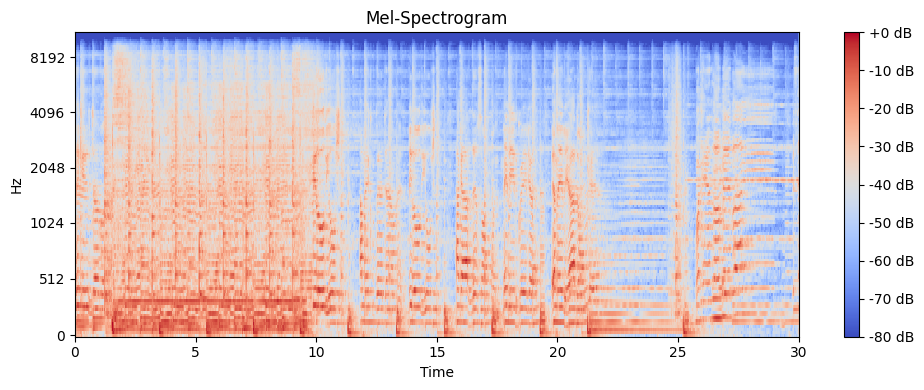

In [10]:
# 1. Mel-Spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

# 2. MFCCs (Mel Frequency Cepstral Coefficients)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# 3. Spectral Centroid (represents brightness)
spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)

# 4. Spectral Bandwidth
spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)

# 5. Chroma STFT (represents pitch classes)
chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)

# 6. Spectral Contrast (difference between peaks and valleys in the spectrum)
spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)

# 7. Root Mean Square Energy (RMS)
rms = librosa.feature.rms(y=y)

# 8. Zero Crossing Rate (how often the signal crosses zero)
zero_crossing_rate = librosa.feature.zero_crossing_rate(y)

# Create a dictionary to store the extracted features
features = {
    'mel_spectrogram': mel_spectrogram,
    'mfccs': mfccs,
    'spectral_centroid': spectral_centroid,
    'spectral_bandwidth': spectral_bandwidth,
    'chroma_stft': chroma_stft,
    'spectral_contrast': spectral_contrast,
    'rms': rms,
    'zero_crossing_rate': zero_crossing_rate
}

# Displaying Shapes of Features
for feature_name, feature_values in features.items():
    print(f"{feature_name}: {feature_values.shape}")

# You can also visualize the features
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel', cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram')
plt.tight_layout()
plt.show()